**Introduction**

Everyone in today's hectic society faces pressure from a variety of sources, such as employment, education, housing, health, and so forth. Individuals in this continuously stressful setting experience a wide range of health issues. According to medical professionals, heart disease, also known as cardiovascular disease, is the main cause of mortality. Heart-related diseases account for almost 31% of deaths globally, according to data released by the World Health Organization (WHO).

The heart, one of the most vital organs in the human body, continuously and regularly pumps blood to the rest of the body to maintain normal physiological activity. Its functions include carrying oxygen, nutrients, and certain metabolites. The topic of how to track cardiac health and estimate the chance of illness has attracted a lot of attention. In order to determine the likelihood of heart disease, this article focuses on the potential predictive value of age, maximum heart rate, and resting blood pressure at admission.

In the Heart Disease dataset donated to the University of California, Irvine, a group of researchers used 14 variables to determine whether or not a patient would be diagnosed with heart disease. Using the combined data from scientists in Cleveland, Hungary, Long Island, and Switzerland as a training set for our K-nearest prediction, the given dataset will be narrowed down to answer the project-specific question. 

(Word Count: 220)

**Preliminary Exploratory Data Analysis**

In [48]:
#Packages
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
options(repr.matrix.max.rows = 10)

In [60]:
# Variables (Column names according to the dataset specification)
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                  "thalach", "exang", "oldpeak", "slope", "ca", "thal", "is_disease_present")

#Datasets of Heart Disease from each country
cleveland <- read_csv("https://raw.githubusercontent.com/holiday-sean/dsci100_project/main/heart_and_disease/processed.cleveland.data", 
                                    col_names = column_names) 
hungarian <- read_csv("https://raw.githubusercontent.com/holiday-sean/dsci100_project/main/heart_and_disease/processed.hungarian.data", 
                                    col_names = column_names)
switzerland <- read_csv("https://raw.githubusercontent.com/holiday-sean/dsci100_project/main/heart_and_disease/processed.switzerland.data",
                                    col_names = column_names)
va <- read_csv("https://raw.githubusercontent.com/holiday-sean/dsci100_project/main/heart_and_disease/processed.va.data", 
                                    col_names = column_names)

#Dataset of Heart Disease (Combines the datasets from each country into one dataset)
heart_disease_cleveland <- read_csv("https://raw.githubusercontent.com/holiday-sean/dsci100_project/main/heart_and_disease/processed.cleveland.data", 
                                    col_names = column_names) |>
    mutate(is_disease_present = as.character(is_disease_present)) |>
    mutate(is_disease_present = as_factor(is_disease_present)) |>
    mutate(is_disease_present = fct_recode(is_disease_present, "No" = "0", "Yes" = "1", "Yes" = "2", "Yes" = "3", "Yes" = "4"))

heart_disease_all <- rbind(cleveland, hungarian) |>
    rbind(switzerland) |>
    rbind(va)

#Setting the 'is_disease_present' as the factor variable, and mutating it to character type instead of double type
heart_disease_all |>
    mutate(is_disease_present = as.character(is_disease_present)) |>
    mutate(is_disease_present = as_factor(is_disease_present)) |>
    mutate(is_disease_present = fct_recode(is_disease_present, "No" = "0", "Yes" = "1", "Yes" = "2", "Yes" = "3", "Yes" = "4"))

#Removing the NA variable
heart_disease_all[heart_disease_all == "?"] <- NA

heart_disease_all_final <- na.omit(heart_disease_all)
summary(heart_disease_all_final)
heart_disease_all_final

#Converting data into numerical values
heart_disease_convert <- type.convert(heart_disease_all_final, na.strings = "NA", as.is = FALSE, dec = ".", 
            numerals = c("allow.loss"))
heart_disease_convert

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, is_disease_present

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, chol, is_disease_p

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,is_disease_present
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,No
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,Yes
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,Yes
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,No
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
54,0,4,127,333,1,1,154,0,0,?,?,?,Yes
62,1,1,?,139,0,1,?,?,?,?,?,?,No
55,1,4,122,223,1,1,100,0,0,?,?,6,Yes


      age             sex               cp          trestbps        
 Min.   :29.00   Min.   :0.0000   Min.   :1.000   Length:299        
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000   Class :character  
 Median :56.00   Median :1.0000   Median :3.000   Mode  :character  
 Mean   :54.52   Mean   :0.6789   Mean   :3.164                     
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000                     
 Max.   :77.00   Max.   :1.0000   Max.   :4.000                     
     chol               fbs              restecg            thalach         
 Length:299         Length:299         Length:299         Length:299        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                       

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,is_disease_present
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0,2,1.0,3.0,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,is_disease_present
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [61]:
heart_disease_split <- initial_split(heart_disease_cleveland, prop = 0.75, strata = is_disease_present)
cleveland_training <- training(heart_disease_split)
cleveland_testing <- testing(heart_disease_split) 

In [62]:
#Summarizing (Exploratory Analysis)

summarized_table <- cleveland_training |>
    summarize(count_disease_present = sum(is_disease_present == "Yes", na.rm = TRUE),
              count_disease_not_present = sum(is_disease_present == "No", na.rm = TRUE))

##ISSUE IS HERE.
summarized_vars <- heart_disease_convert |> 
    group_by(is_disease_present) %>%
    summarize(avg_age = mean(age, na.rm = TRUE),
             avg_trestbps = mean(trestbps, na.rm = TRUE), 
             avg_thalach = mean(thalach, na.rm = TRUE))
                              
summarized_table

summarized_vars


count_disease_present,count_disease_not_present
<int>,<int>
104,123


is_disease_present,avg_age,avg_trestbps,avg_thalach
<int>,<dbl>,<dbl>,<dbl>
0,52.64375,129.1750,158.5813
1,55.46429,133.3393,144.6607
2,58.20000,134.3714,135.0000
3,56.00000,135.4571,132.0571
4,59.69231,138.7692,140.6154


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


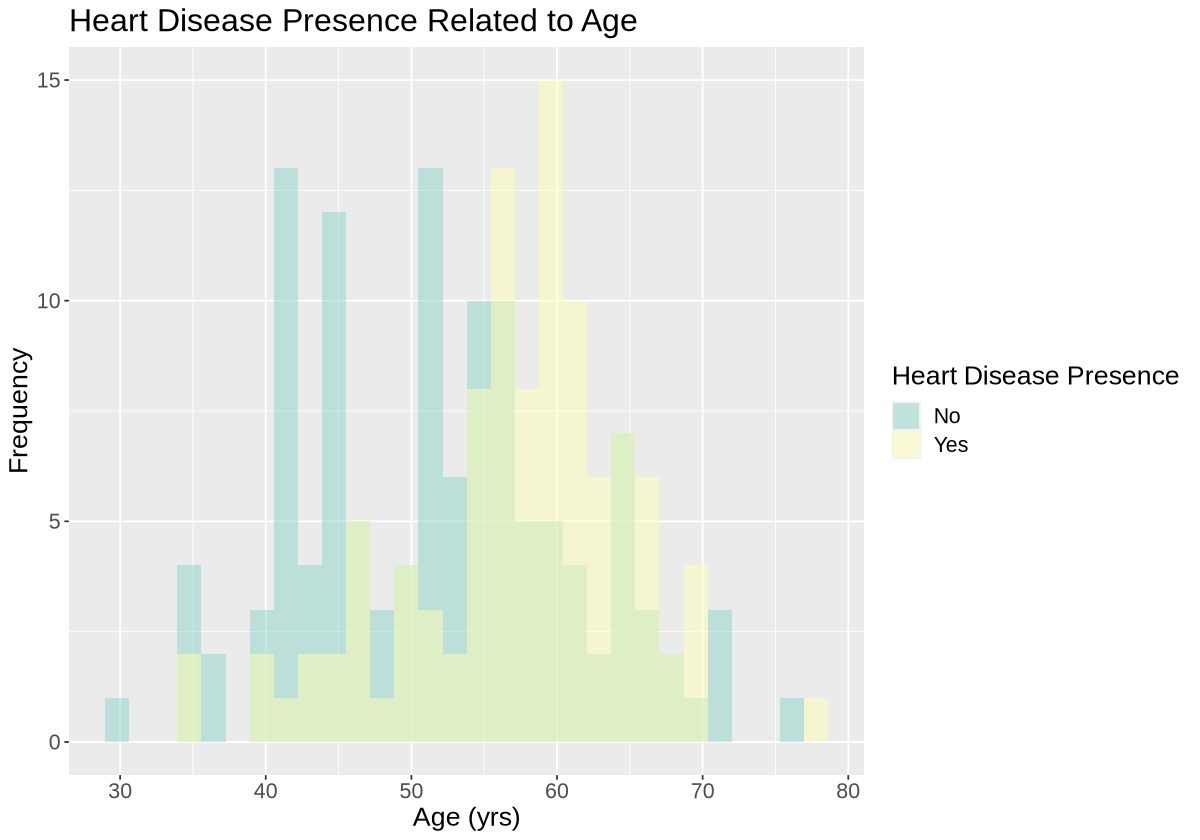

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


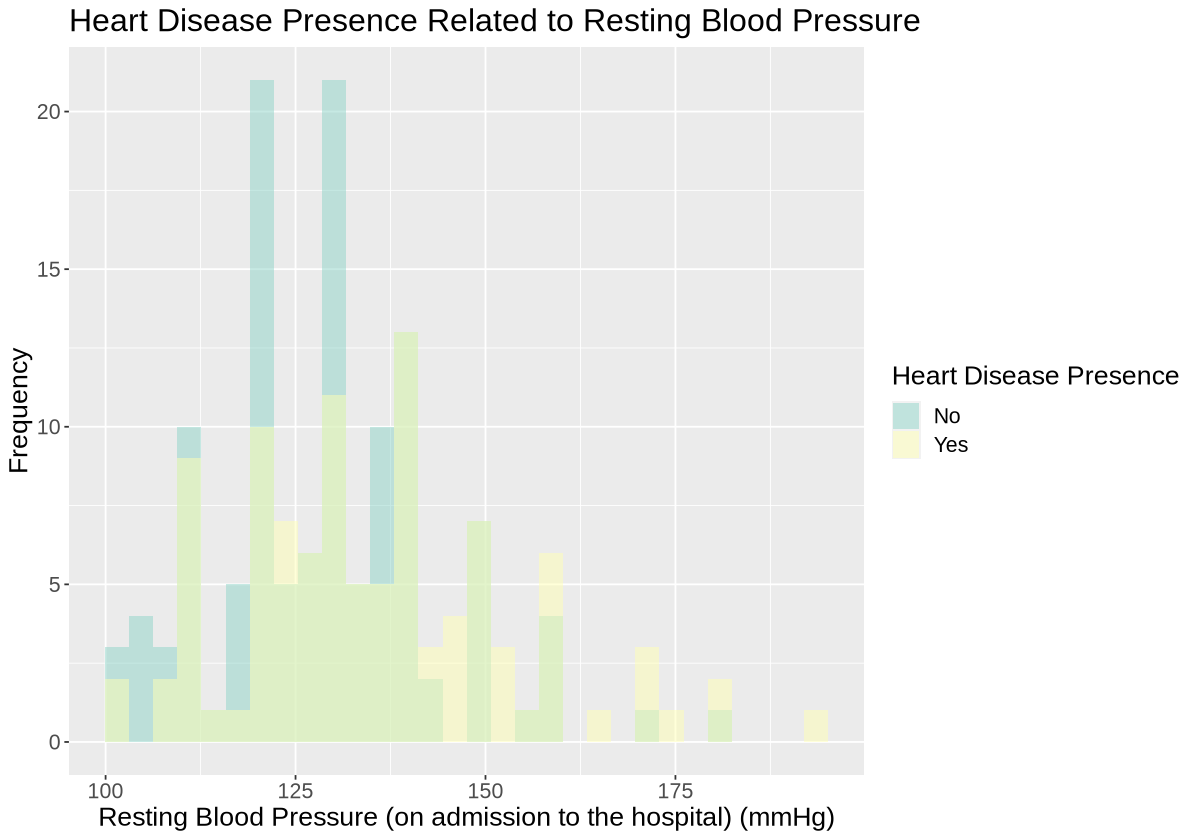

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


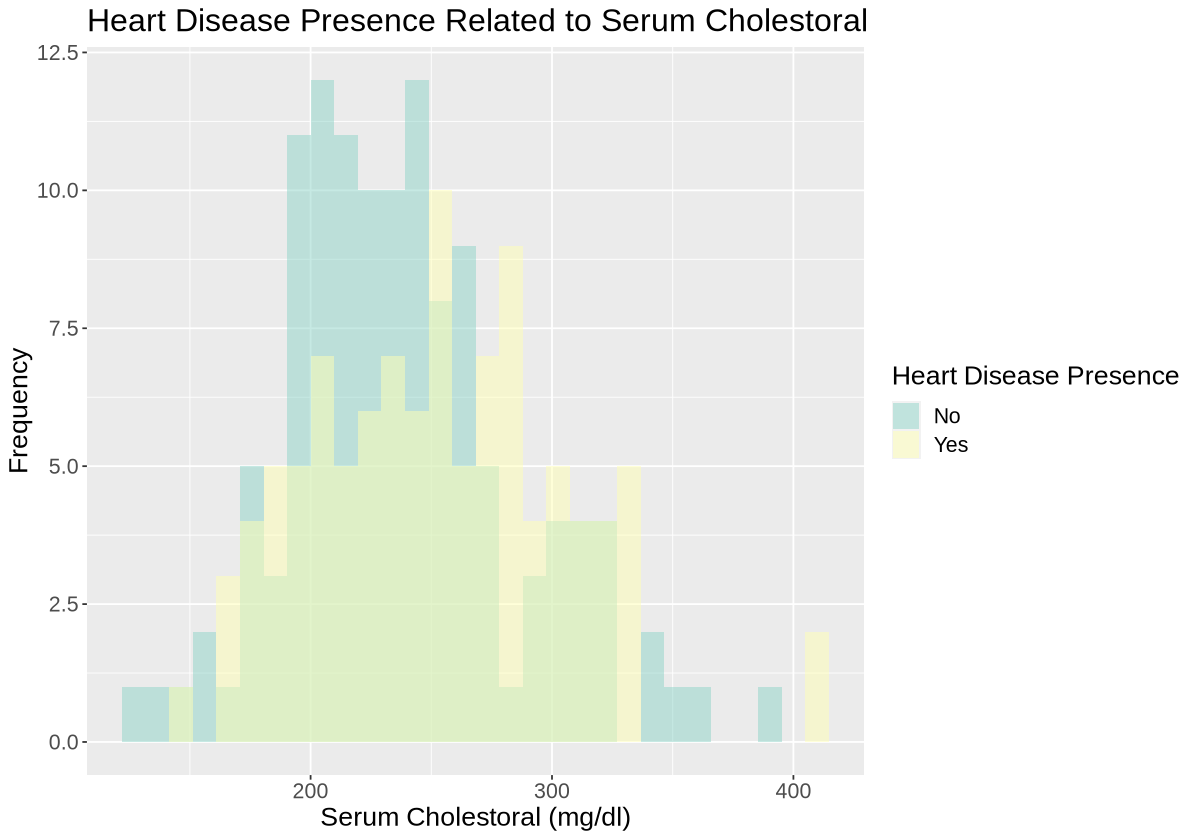

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


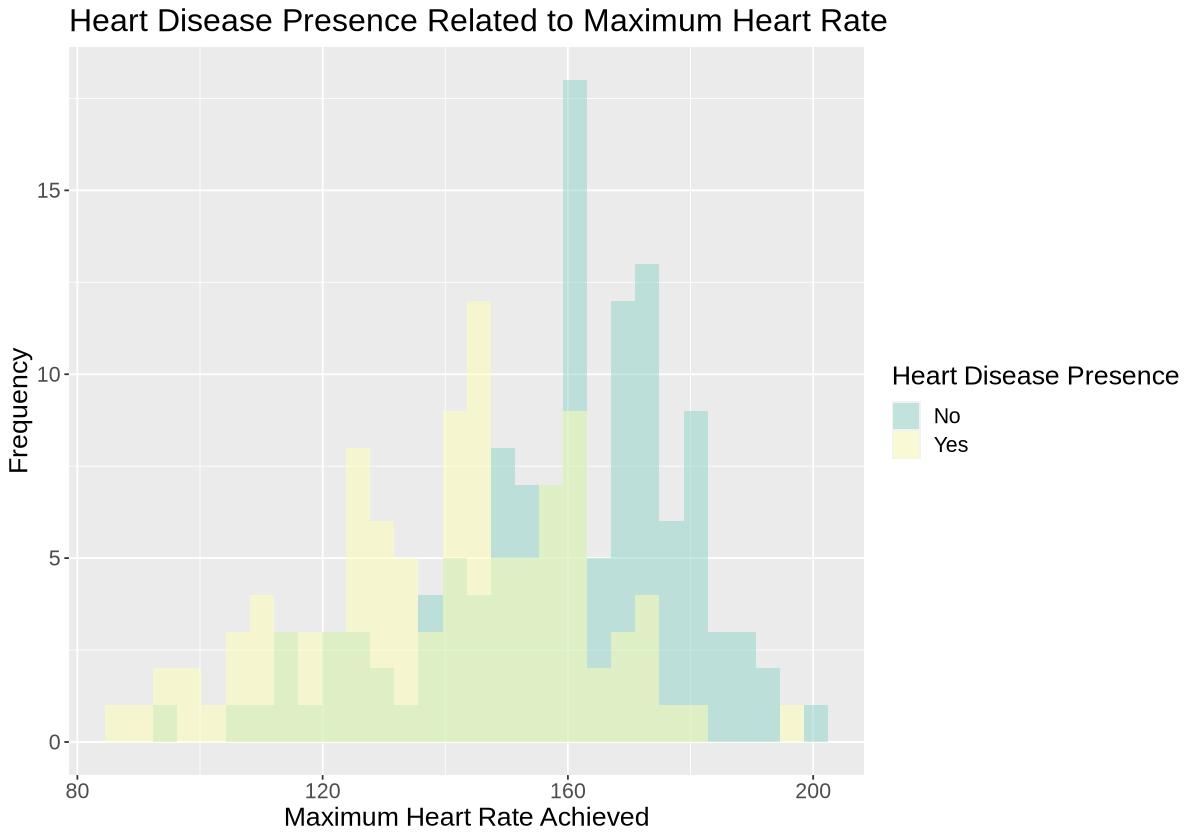

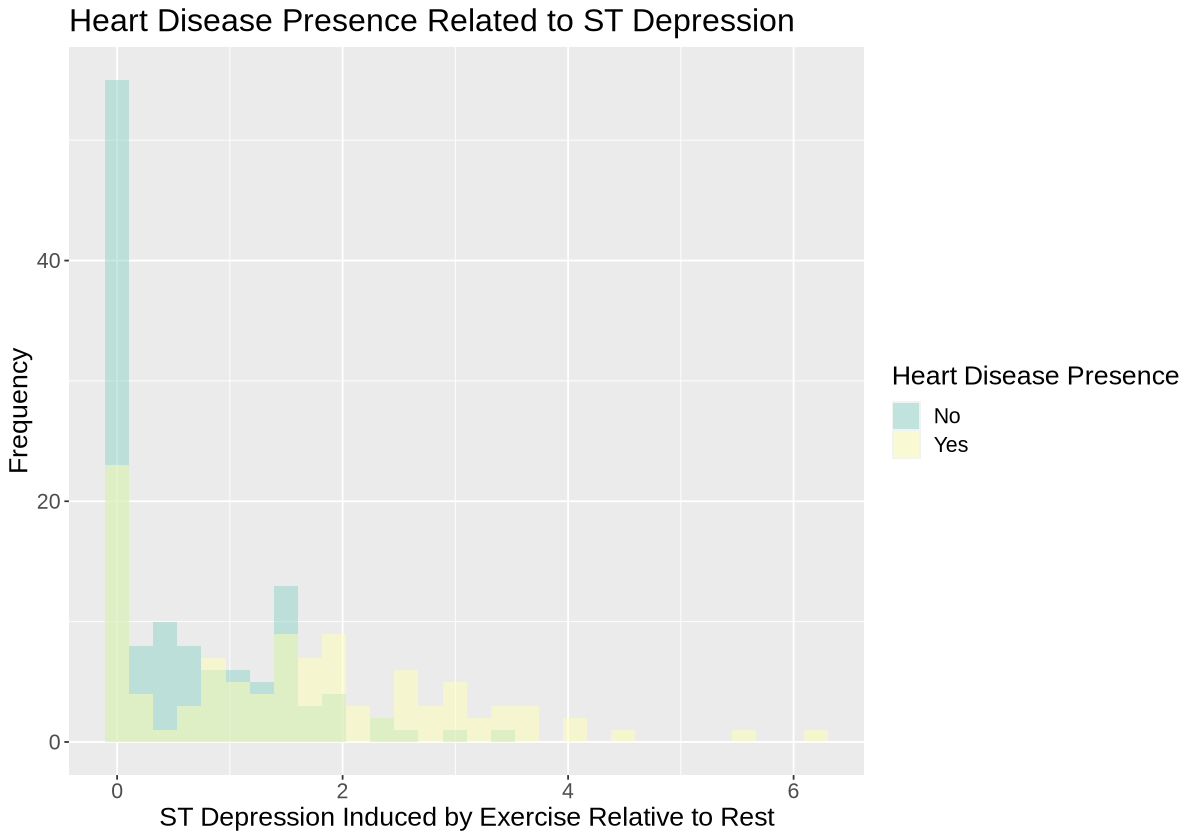

In [36]:
#Data Visualization (Exploratory Analysis)

#Quantitative Variables (age, trestbps, chol, thalach)
options(repr.plot.width = 10, repr.plot.height = 7)

quantitative_vars <- c("age", "trestbps", "chol", "thalach", "oldpeak")

age_histogram <- cleveland_training %>%
  ggplot(aes(x = age, fill = is_disease_present)) + 
  geom_histogram(alpha = 0.5,               
                 position = "identity") +  
  labs(x = "Age (yrs)",
       y = "Frequency",
       title = "Heart Disease Presence Related to Age",
       fill = "Heart Disease Presence") +
  scale_fill_brewer(palette = 'Set3') +
  theme(text = element_text(size = 16))

trestbps_histogram <- cleveland_training %>%
  ggplot(aes(x = trestbps, fill = is_disease_present)) + 
  geom_histogram(alpha = 0.5,               
                 position = "identity") +  
  labs(x = "Resting Blood Pressure (on admission to the hospital) (mmHg)",
       y = "Frequency",
       title = "Heart Disease Presence Related to Resting Blood Pressure",
       fill = "Heart Disease Presence") +
  scale_fill_brewer(palette = 'Set3') +
  theme(text = element_text(size = 16))

chol_histogram <- cleveland_training %>%
  ggplot(aes(x = chol, fill = is_disease_present)) +  
  geom_histogram(alpha = 0.5,               
                 position = "identity") +  
  labs(x = "Serum Cholestoral (mg/dl)",
       y = "Frequency",
       title = "Heart Disease Presence Related to Serum Cholestoral",
       fill = "Heart Disease Presence") +
  scale_fill_brewer(palette = 'Set3') +
  theme(text = element_text(size = 16))  

thalach_histogram <- cleveland_training %>%
  ggplot(aes(x = thalach, fill = is_disease_present)) +  
  geom_histogram(alpha = 0.5,               
                 position = "identity") +  
  labs(x = "Maximum Heart Rate Achieved",
       y = "Frequency",
       title = "Heart Disease Presence Related to Maximum Heart Rate",
       fill = "Heart Disease Presence") +
  scale_fill_brewer(palette = 'Set3') +
  theme(text = element_text(size = 16))

oldpeak_histogram <- cleveland_training %>%
  ggplot(aes(x = oldpeak, fill = is_disease_present)) +  
  geom_histogram(alpha = 0.5,               
                 position = "identity") +  
  labs(x = "ST Depression Induced by Exercise Relative to Rest",
       y = "Frequency",
       title = "Heart Disease Presence Related to ST Depression",
       fill = "Heart Disease Presence") +
  scale_fill_brewer(palette = 'Set3') +
  theme(text = element_text(size = 16))   

age_histogram
trestbps_histogram
chol_histogram
thalach_histogram
oldpeak_histogram

In [3]:
#Data Visualization (Exploratory Analysis - We probably will not use this...)

#Qualitative Variables (sex, cp, fbs, restecg, exang, xhypo, slope, ca, thal)
options(repr.plot.width = 10, repr.plot.height = 7)

sex_data <- cleveland_training |>
    group_by(is_disease_present, sex) |>
    summarize(count = n()) |>
    mutate(sex = as.character(sex)) |>
    mutate(sex = fct_recode(sex, "Male" = "1", "Female" = "0"))

sex_plot <- sex_data |>
    ggplot(aes(x = sex,y = count, fill = is_disease_present)) + 
    geom_bar(stat = "identity", position = "fill") + 
    labs(fill = "Heart Disease Presence",
         x = "Sex",
         y = "Proportion",
         title = "Proportion of Sex to Heart Disease Presence") +
    scale_fill_brewer(palette = 'Set3') +
    theme(text = element_text(size = 16))

sex_plot

cp_data <- cleveland_training |>
    group_by(is_disease_present, cp) |>
    summarize(count = n()) |>
    mutate(cp = as.character(cp)) |>
    mutate(cp = fct_recode(cp, "Typical Angina" = "1", 
                                "Atypical Angina" = "2",
                                "Non-Anginal Pain" = "3",
                                "Asymptomatic" = "4"))

cp_data

cp_plot <- cp_data |>
    ggplot(aes(x = cp, y = count, fill = is_disease_present)) + 
    geom_bar(stat = "identity", position = "fill") + 
    labs(fill = "Heart Disease Presence",
         x = "Chest Pain Type",
         y = "Proportion",
         title = "Proportion of Chest Pain Type to Heart Disease Presence") +
    scale_fill_brewer(palette = 'Set3') +
    theme(text = element_text(size = 16))

cp_plot

exang_data <- cleveland_training |>
    group_by(is_disease_present, exang) |>
    summarize(count = n()) |>
    mutate(exang = as.character(exang)) |>
    mutate(exang = fct_recode(exang, "No" = "0", "Yes" = "1")) |>
    mutate(exercise_induced_angina = exang) |>
    select(-exang) 
    
exang_data

exang_plot <- exang_data |>
    ggplot(aes(x = exercise_induced_angina, y = count, fill = is_disease_present)) + 
    geom_bar(stat = "identity", position = "fill") +
    labs(fill = "Heart Disease Presence",
         x = "Angina Presence While Exercise",
         y = "Proportion",
         title = "Proportion of Angina Presence to Heart Disease Presence") +
    scale_fill_brewer(palette = 'Set3') +
    theme(text = element_text(size = 16))

exang_plot

ERROR: Error in eval(expr, envir, enclos): object 'cleveland_training' not found


**Expected Outcomes and Significance**

**Expected finding**: With the increasing age, maximum heart rate, and resting blood pressure at admission, the likelihood of having heart disease is going to increase too.

**The impact of the finding**: Helping people to predict heart diseases better, or avoid getting heart diseases by gaining a better understanding of the associated risk factors.

**The future question**: We only examined the relationship between heart disease between 3 variables, but there are a total of 14 variables in the original dataset. There are more variables to be studied based on their relationships with heart disease.
